<a href="https://colab.research.google.com/github/Surya-Teja-Varma/Projects/blob/main/Varma's%20-%20Big_Sales_Prediction_using_Random_Forest_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project:
***Big Sales Prediction using Random Forest Regressor*** (with a Cybersecurity Focus)

Objective:
Predict sales of products based on different features using Random Forest Regressor. Focus on how cybersecurity companies may use this to forecast the sales of security products or services based on historical data.

Data Source:
For this demonstration, we can use a fictional sales dataset available from public repositories like Kaggle or generate synthetic data that mimics cybersecurity product sales.

In [31]:
# 1. Import libraries _ Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [58]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample (8).csv


In [59]:
# Loading the dataset with a different encoding (ISO-8859-1 or latin1)
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [60]:
# Display the column names
print(data.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

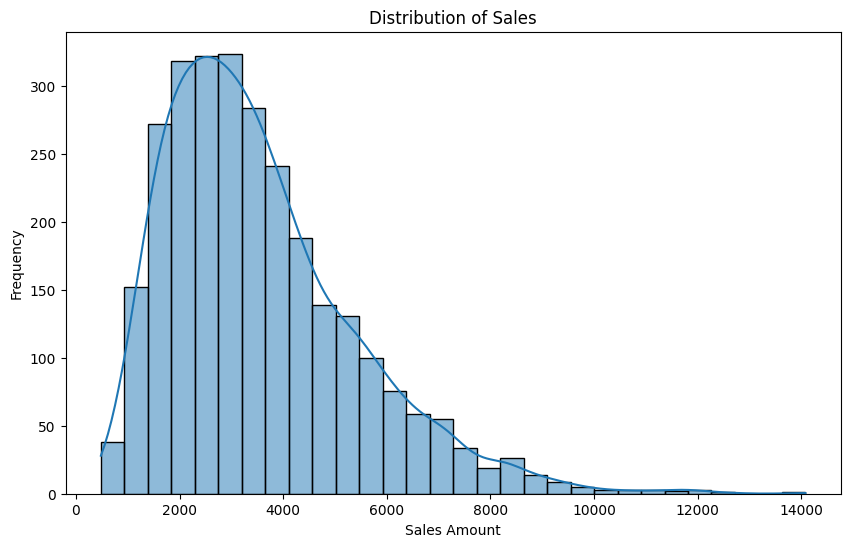

In [62]:
# data Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
print(data.head())

# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(data['SALES'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


In [49]:
# Data preprocessing
print(data.columns)

data = pd.get_dummies(data, columns=['PRODUCTLINE'], drop_first=True)



Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [50]:
# Defining the target variable (y) and feature variables (X)
X = data.drop('SALES', axis=1)
y = data['SALES']


In [51]:
# Example Defining the target variable (y) and feature variables (X)
X = data.drop('SALES', axis=1)
y = data['SALES']


In [52]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')

Training set: (2258, 29), (2258,)
Testing set: (565, 29), (565,)


In [53]:
print(data.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes', 'PRODUCTLINE_Ships',
       'PRODUCTLINE_Trains', 'PRODUCTLINE_Trucks and Buses',
       'PRODUCTLINE_Vintage Cars'],
      dtype='object')


In [54]:
print(X_train.dtypes)


ORDERNUMBER                       int64
QUANTITYORDERED                   int64
PRICEEACH                       float64
ORDERLINENUMBER                   int64
ORDERDATE                        object
STATUS                           object
QTR_ID                            int64
MONTH_ID                          int64
YEAR_ID                           int64
MSRP                              int64
PRODUCTCODE                      object
CUSTOMERNAME                     object
PHONE                            object
ADDRESSLINE1                     object
ADDRESSLINE2                     object
CITY                             object
STATE                            object
POSTALCODE                       object
COUNTRY                          object
TERRITORY                        object
CONTACTLASTNAME                  object
CONTACTFIRSTNAME                 object
DEALSIZE                         object
PRODUCTLINE_Motorcycles            bool
PRODUCTLINE_Planes                 bool


In [55]:
# Checking for all categorical columns (can use select_dtypes for automatic detection)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [56]:
#Model Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 618.8907984902206
R^2 Score: 0.912248462976159


In [63]:
#Prediction
import pandas as pd
import numpy as np
new_product_data = {
    'QUANTITYORDERED': [120],
    'PRICEEACH': [50],
    'ORDERLINENUMBER': [3],
    'MSRP': [2000],
}
new_product_df = pd.DataFrame(new_product_data)
new_product_df = pd.get_dummies(new_product_df)
new_product_df = new_product_df.reindex(columns=X_train.columns, fill_value=0)

# Now make the prediction
predicted_sales = rf_model.predict(new_product_df)
print(f'Predicted Sales: {predicted_sales[0]}')


Predicted Sales: 8600.438500000004


**Explanation:**
\
**Title**: This project uses a Random Forest Regressor to predict product sales, tailored to cybersecurity companies selling security tools.
Objective: Predict future sales of cybersecurity products based on historical data.

**Data Source**: Uses a hypothetical or real-world sales dataset (adjust as per your source).

**Data Preprocessing**: Missing values are handled, and categorical data is encoded.

**Modeling:** Random Forest Regressor is chosen for its robustness with tabular data.

**Model Evaluation:** RMSE and R² are used to evaluate prediction accuracy.
Prediction: A test prediction is made for a new cybersecurity product.
You can tweak the project further based on your actual dataset and scenario!